# **Cyclistic bike-share analysis case study.**


## Objective
This [case study](https://www.coursera.org/learn/google-data-analytics-capstone/supplement/7PGIT/case-study-1-how-does-a-bike-share-navigate-speedy-success) is the final part of the [Google Data Analytics Professional Certificate](https://www.coursera.org/professional-certificates/google-data-analytics) available on coursera.

### Company Background

Cyclistic is a fictional bike-share company based in Chicago. It offers bicycles, electric bicycles, and scooters to riders across the city. While many Cyclistic users ride for leisure, approximately 30% use the service to commute to work daily.

Cyclistic provides three pricing plans:
- Single-ride passes
- Full-day passes
- Annual memberships

Riders who purchase single-ride or full-day passes are referred to as casual users, whereas those with annual memberships are Cyclistic members.

Recent financial analysis suggests that annual members are significantly more profitable than casual riders. Cyclistic's marketing director sees an opportunity to convert more casual users into members. To do this, the team must better understand how casual riders and members behave differently, what might motivate casual users to become members, and how digital media could shape their strategy.

### Report Overview

The central question is:

> **"How do annual members and casual riders use Cyclistic bikes differently?"**

The report must deliver:
1. A clear statement of the business task
2. A description of all data sources used
3. Documentation of any cleaning or manipulation of data
4. A summary of analysis
5. Supporting visualisations and key findings
6. My top three recommendations based on the analysis

This Colab notebook aims to fulfill all these requirements while showcasing a clear, step-by-step analytical approach.


## Data Preparation


### Collate data for past 12 months
This project was completed at the beginning of July 2025. It required me to select the past 12 months data from an index provided in the course which can be found [here](https://divvy-tripdata.s3.amazonaws.com/index.html).

In [54]:
import pandas as pd
import zipfile
import io
import requests

urls = [
    "https://divvy-tripdata.s3.amazonaws.com/202505-divvy-tripdata.zip",
    "https://divvy-tripdata.s3.amazonaws.com/202504-divvy-tripdata.zip",
    "https://divvy-tripdata.s3.amazonaws.com/202503-divvy-tripdata.zip",
    "https://divvy-tripdata.s3.amazonaws.com/202502-divvy-tripdata.zip",
    "https://divvy-tripdata.s3.amazonaws.com/202501-divvy-tripdata.zip",
    "https://divvy-tripdata.s3.amazonaws.com/202412-divvy-tripdata.zip",
    "https://divvy-tripdata.s3.amazonaws.com/202411-divvy-tripdata.zip",
    "https://divvy-tripdata.s3.amazonaws.com/202410-divvy-tripdata.zip",
    "https://divvy-tripdata.s3.amazonaws.com/202409-divvy-tripdata.zip",
    "https://divvy-tripdata.s3.amazonaws.com/202408-divvy-tripdata.zip",
    "https://divvy-tripdata.s3.amazonaws.com/202407-divvy-tripdata.zip",
    "https://divvy-tripdata.s3.amazonaws.com/202406-divvy-tripdata.zip"
]

In [55]:
dfs = []

for url in urls:
    print(f"Downloading from {url}...")
    r = requests.get(url)
    with zipfile.ZipFile(io.BytesIO(r.content)) as z:
        for filename in z.namelist():
            if filename.endswith('.csv') and not filename.startswith('__MACOSX'):
                print(f"  Reading {filename}...")
                with z.open(filename) as f:
                    try:
                        df = pd.read_csv(f)
                    except UnicodeDecodeError:
                        f.seek(0)  # reset file pointer
                        df = pd.read_csv(f, encoding='ISO-8859-1')
                    dfs.append(df)

df = pd.concat(dfs, ignore_index=True)
print("✅ All files combined!")
df.head()

  Reading 202505-divvy-tripdata.csv...
  Reading 202504-divvy-tripdata.csv...
  Reading 202503-divvy-tripdata.csv...
  Reading 202502-divvy-tripdata.csv...
  Reading 202501-divvy-tripdata.csv...
  Reading 202412-divvy-tripdata.csv...
  Reading 202411-divvy-tripdata.csv...
  Reading 202410-divvy-tripdata.csv...
  Reading 202409-divvy-tripdata.csv...
  Reading 202408-divvy-tripdata.csv...
  Reading 202407-divvy-tripdata.csv...
  Reading 202406-divvy-tripdata.csv...
✅ All files combined!


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,BADF67E2C5058F19,classic_bike,2025-05-11 17:22:39.471,2025-05-11 18:11:19.249,DuSable Lake Shore Dr & North Blvd,LF-005,Winthrop Ave & Lawrence Ave,TA1308000021,41.911722,-87.626804,41.968812,-87.657659,member
1,0210AE485D59C8C5,electric_bike,2025-05-05 08:02:09.251,2025-05-05 08:12:07.549,Damen Ave & Grand Ave,TA1308000006,Desplaines St & Jackson Blvd,15539,41.892394,-87.676885,41.878119,-87.643948,member
2,5E68FE5B9283E4C4,classic_bike,2025-05-02 10:32:33.062,2025-05-02 10:39:07.262,LaSalle St & Illinois St,13430,Clark St & Elm St,TA1307000039,41.890762,-87.631697,41.903322,-87.632999,member
3,13D2DCD6FB872858,classic_bike,2025-05-12 11:12:16.579,2025-05-12 11:17:25.126,Milwaukee Ave & Rockwell St,13242,Damen Ave & Cortland St,13133,41.920330,-87.693090,41.915983,-87.677335,member
4,F04DF9EE163351DD,classic_bike,2025-05-01 10:13:36.821,2025-05-01 10:17:40.548,Halsted St & Roosevelt Rd,TA1305000017,Clinton St & Roosevelt Rd,WL-008,41.867324,-87.648625,41.867118,-87.641088,member


### Examining The Data

Number of rows and columns in the dataset:

In [56]:
df.shape

(5628847, 13)

List of columns in dataframe:

In [57]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')

General info:

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5628847 entries, 0 to 5628846
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 558.3+ MB


### Converting Timestamps
The columns 'started_at' and 'ended_at' are timestamps but are currently set to datatype of 'object'. This needs correcting so that ride durations and days of the week can easily be considered in analysis.

In [59]:
# Convert columns to datetime format
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])
# Confirm change to colunn type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5628847 entries, 0 to 5628846
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
dtypes: datetime64[ns](2), float64(4), object(7)
memory usage: 558.3+ MB


### Calculating Hire Time
Insert a column showing total time of each hire and also a column showing the day of the week the hire began.

In [60]:
# Calculate hire time
df['hire_time'] = df['ended_at'] - df['started_at']
# Create day_of_week column with full weekday names
df['day_of_week'] = df['started_at'].dt.day_name()
# add new column reflecting hiretime by minutes
df['hire_time_mins'] = (df['hire_time'].dt.total_seconds() / 60).round(1)
# Sneak peak at first 5 rows of data
df.head(5)


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,hire_time,day_of_week,hire_time_mins
0,BADF67E2C5058F19,classic_bike,2025-05-11 17:22:39.471,2025-05-11 18:11:19.249,DuSable Lake Shore Dr & North Blvd,LF-005,Winthrop Ave & Lawrence Ave,TA1308000021,41.911722,-87.626804,41.968812,-87.657659,member,0 days 00:48:39.778000,Sunday,48.7
1,0210AE485D59C8C5,electric_bike,2025-05-05 08:02:09.251,2025-05-05 08:12:07.549,Damen Ave & Grand Ave,TA1308000006,Desplaines St & Jackson Blvd,15539,41.892394,-87.676885,41.878119,-87.643948,member,0 days 00:09:58.298000,Monday,10.0
2,5E68FE5B9283E4C4,classic_bike,2025-05-02 10:32:33.062,2025-05-02 10:39:07.262,LaSalle St & Illinois St,13430,Clark St & Elm St,TA1307000039,41.890762,-87.631697,41.903322,-87.632999,member,0 days 00:06:34.200000,Friday,6.6
3,13D2DCD6FB872858,classic_bike,2025-05-12 11:12:16.579,2025-05-12 11:17:25.126,Milwaukee Ave & Rockwell St,13242,Damen Ave & Cortland St,13133,41.920330,-87.693090,41.915983,-87.677335,member,0 days 00:05:08.547000,Monday,5.1
4,F04DF9EE163351DD,classic_bike,2025-05-01 10:13:36.821,2025-05-01 10:17:40.548,Halsted St & Roosevelt Rd,TA1305000017,Clinton St & Roosevelt Rd,WL-008,41.867324,-87.648625,41.867118,-87.641088,member,0 days 00:04:03.727000,Thursday,4.1


In [61]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5628847 entries, 0 to 5628846
Data columns (total 16 columns):
 #   Column              Dtype          
---  ------              -----          
 0   ride_id             object         
 1   rideable_type       object         
 2   started_at          datetime64[ns] 
 3   ended_at            datetime64[ns] 
 4   start_station_name  object         
 5   start_station_id    object         
 6   end_station_name    object         
 7   end_station_id      object         
 8   start_lat           float64        
 9   start_lng           float64        
 10  end_lat             float64        
 11  end_lng             float64        
 12  member_casual       object         
 13  hire_time           timedelta64[ns]
 14  day_of_week         object         
 15  hire_time_mins      float64        
dtypes: datetime64[ns](2), float64(5), object(8), timedelta64[ns](1)
memory usage: 687.1+ MB


### Investigating the data

Starting by looking at summary data:

In [62]:
# Check null values
df.isnull().sum()

,0
ride_id,0
rideable_type,0
started_at,0
ended_at,0
start_station_name,1081945
start_station_id,1081945
end_station_name,1110740
end_station_id,1110740
start_lat,0
start_lng,0


Whilst there are a lot of null values, these are not going to affect the analysis planned for this report.

In [63]:


# Summary of hire time
hire_summary = df['hire_time'].agg(['min', 'mean', 'max'])

# Earliest and latest ride start dates
earliest_date = df['started_at'].min()
latest_date = df['started_at'].max()

# Define weekday order
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Group by day_of_week, member_casual, and rideable_type
detailed_counts = (
    df.groupby(['day_of_week', 'member_casual', 'rideable_type'])
    .size()
    .unstack(['member_casual', 'rideable_type'], fill_value=0)
    .reindex(weekday_order)
)

# Display results
print("Hire Time Summary:\n")
print(hire_summary)

print(f"\nEarliest Ride Start Date: {earliest_date}")
print(f"Latest Ride Start Date:   {latest_date}")

print("\nMember vs Casual Counts by Day of Week and Bike Type:\n")
print(detailed_counts)


Hire Time Summary:

min     -1 days +23:03:58.698000
mean   0 days 00:16:37.677265134
max       1 days 01:59:55.072000
Name: hire_time, dtype: timedelta64[ns]

Earliest Ride Start Date: 2024-05-31 01:02:49.582000
Latest Ride Start Date:   2025-05-31 23:58:56.394000

Member vs Casual Counts by Day of Week and Bike Type:

member_casual       casual                                      member  \
rideable_type classic_bike electric_bike electric_scooter classic_bike   
day_of_week                                                              
Monday               98753        129081            12476       226349   
Tuesday              88046        124507            10122       240014   
Wednesday            99816        139083            11466       245985   
Thursday            101540        146778            11996       234719   
Friday              131507        175969            12235       216790   
Saturday            195740        216386            13497       199660   
Sunday      

There appears to be negative values in the minimum hire time which suggests problems with the data.

In [64]:
# Filter rows where ride_length is negative
negative_rides = df[df['hire_time'] < pd.Timedelta(0)]

# Display result
print("total number of negative rides =", len(negative_rides))
print("\n\n")
print(negative_rides)

total number of negative rides = 43



                  ride_id  rideable_type              started_at  \
1645383  A3C86101B94DCF83   classic_bike 2024-11-03 01:53:34.934   
1647371  9E3880C1B94EAB39  electric_bike 2024-11-03 01:48:07.988   
1650276  A21F9A727675300F  electric_bike 2024-11-03 01:53:22.726   
1657212  61C2AE038C0D67AB   classic_bike 2024-11-03 01:25:33.243   
1672984  E44DD2F8C07D6B2D  electric_bike 2024-11-03 01:49:17.648   
1675082  F147973D700AA375  electric_bike 2024-11-03 01:50:02.506   
1691337  F600DA96D6308ABF  electric_bike 2024-11-03 01:55:22.919   
1693164  CFED9E2BF0A7F676  electric_bike 2024-11-03 01:50:18.246   
1701744  BB4F8E728A4714E3   classic_bike 2024-11-03 01:55:10.885   
1706124  5DD72265826A6FC0   classic_bike 2024-11-03 01:53:34.793   
1726908  1ED3B2ACE0FE3C99  electric_bike 2024-11-03 01:59:24.648   
1735552  76C64FC8024DA2AC  electric_bike 2024-11-03 01:54:39.214   
1740432  CB6B83A69815601E   classic_bike 2024-11-03 01:25:14.083   
1743406  

All of the negative ride lengths were on 3rd November 2024. On investigation it transpires that the clocks moved an hour in Chicago on this day due to daylight savings and this has caused this anomoly. To fix it, I will add one hour onto the end time of any ride which started between 01:00 and 02:00.

In [65]:
# Create a one-hour timedelta
one_hour = pd.Timedelta(hours=1)

# Identify rows where started_at is on 2024-11-03 between 01:00 and 01:59
dst_mask = (
    (df['started_at'].dt.date == pd.to_datetime('2024-11-03').date()) &
    (df['started_at'].dt.hour == 1)
)

# Apply the one-hour correction to ended_at
df.loc[dst_mask, 'ended_at'] += one_hour

# Recalculate hire_time
df['hire_time'] = df['ended_at'] - df['started_at']

# Recheck the summary of hire time
hire_summary = df['hire_time'].agg(['min', 'mean', 'max'])
print (hire_summary)

min       0 days 00:00:00.039000
mean   0 days 00:16:37.935648423
max       1 days 01:59:55.072000
Name: hire_time, dtype: timedelta64[ns]


Now that negative values have been removed it can be seen that there is at least one ride that is less than one second long, and at least one that is over a day.

### Filtering Outliers in Hire Times

To improve analysis accuracy, I will remove hire times that are either unrealistically short or extremely long. These outliers can skew average hire time and mislead trends. The final data will be put in a new dataset "df_clean" for analysis purposes.

Criteria used:
- Remove rides under 90 seconds (accidental or system tests?)
- Remove rides over 24 hours (forgotten returns or data errors?)

In [66]:
# Filter out unwanted hire lengths
df_clean = df[
    (df['hire_time'] >= pd.Timedelta(seconds=90)) &  # Keep hire length >= 1.5 minutes
    (df['hire_time'] <= pd.Timedelta(days=1))        # Keep hire length <= 1 day
].copy()  # Use .copy() to avoid modifying the original

# Recheck summary of hire time
hire_summary = df_clean['hire_time'].agg(['min', 'mean', 'max'])
print (hire_summary)

min              0 days 00:01:30
mean   0 days 00:15:23.025517018
max       0 days 23:59:56.074000
Name: hire_time, dtype: timedelta64[ns]


In [67]:
# Reminder of number of rows in original data
df.shape

(5628847, 16)

In [68]:
# Check to see how much difference in number of rows of data after data cleaning
df_clean.shape

(5456875, 16)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5628847 entries, 0 to 5628846
Data columns (total 16 columns):
 #   Column              Dtype          
---  ------              -----          
 0   ride_id             object         
 1   rideable_type       object         
 2   started_at          datetime64[ns] 
 3   ended_at            datetime64[ns] 
 4   start_station_name  object         
 5   start_station_id    object         
 6   end_station_name    object         
 7   end_station_id      object         
 8   start_lat           float64        
 9   start_lng           float64        
 10  end_lat             float64        
 11  end_lng             float64        
 12  member_casual       object         
 13  hire_time           timedelta64[ns]
 14  day_of_week         object         
 15  hire_time_mins      float64        
dtypes: datetime64[ns](2), float64(5), object(8), timedelta64[ns](1)
memory usage: 687.1+ MB


## Summary of Analysis
Performing various calculations to consider the data.

In [71]:
# Find all modes (most common days)
mode_days = df_clean['day_of_week'].mode()

# Print each mode individually (in case there is a tie for most common)
print("Most common day(s) of the week:")
for day in mode_days:
    print(f"• {day}")

Most common day(s) of the week:
• Saturday


In [72]:
# define a function to make the hire time easier to read
def format_hire_time(td):
    total_seconds = int(td.total_seconds())
    hours, remainder = divmod(total_seconds, 3600)
    minutes, seconds = divmod(remainder, 60)
    return f"{hours}hrs {minutes}mins {seconds}secs"


# Group by user type and calculate mean and max hire time
hire_stats = df_clean.groupby('member_casual')['hire_time'].agg(['mean', 'max'])

# Apply the formatting function to mean and max hire times
formatted_mean = hire_stats['mean'].apply(format_hire_time)
formatted_max = hire_stats['max'].apply(format_hire_time)

# Create an empty dictionary to store most common days
most_common_days = {}

# Loop through each user type
for user_type in df_clean['member_casual'].unique():
    # Get just the data for this user type
    group = df_clean[df_clean['member_casual'] == user_type]

    # Find the most common day(s)
    mode_result = group['day_of_week'].mode()

    # If there's one most common day, store it directly
    if len(mode_result) == 1:
        most_common_days[user_type] = mode_result[0]
    else:
        # If there are ties, join them into one string
        most_common_days[user_type] = ', '.join(mode_result)

# Combine all into one summary DataFrame
summary_table = pd.DataFrame({
    'Mean Hire Time': formatted_mean,
    'Max Hire Time': formatted_max,
    'Most Common Day': most_common_days
}).T  # Transpose to get metrics as rows

# Display the result
print(summary_table)

                              casual               member
Mean Hire Time    0hrs 20mins 59secs   0hrs 12mins 11secs
Max Hire Time    23hrs 59mins 56secs  23hrs 59mins 55secs
Most Common Day             Saturday            Wednesday


In [73]:
# Count number of hires per day of week and rider type
day_counts = df_clean.groupby(['day_of_week', 'member_casual']).size().unstack(fill_value=0)

# Optional: Reorder days to match calendar order
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts = day_counts.reindex(ordered_days)

# Display the result
print("\n=== Number of hires per user type per day of the week ===\n")
print(day_counts)


=== Number of hires per user type per day of the week ===

member_casual  casual  member
day_of_week                  
Monday         231458  499200
Tuesday        214601  534930
Wednesday      240754  552412
Thursday       250048  542466
Friday         306630  510336
Saturday       406725  453660
Sunday         330215  383440


In [74]:
# Extract month names from the started_at column
df_clean['month'] = df_clean['started_at'].dt.month_name()

# Count number of hires per month and rider type
month_counts = df_clean.groupby(['month', 'member_casual']).size().unstack(fill_value=0)

# Optional: Reorder months to match calendar order
ordered_months = ['January', 'February', 'March', 'April', 'May', 'June',
                  'July', 'August', 'September', 'October', 'November', 'December']
month_counts = month_counts.reindex(ordered_months)

# Display the result
print("\n=== Number of hires per user type per month ===\n")
print(month_counts)


=== Number of hires per user type per month ===

member_casual  casual  member
month                        
January         23257  111052
February        26861  120762
March           82323  206355
April          104576  255437
May            174495  311289
June           288056  399362
July           307462  418980
August         305527  427029
September      331590  461844
October        209023  391661
November        90123  236685
December        37138  135988


In [75]:
# Extract quarter from started_at column
df_clean['quarter'] = df_clean['started_at'].dt.to_period('Q').astype(str)

# Count number of hires per quarter and rider type
quarter_counts = df_clean.groupby(['quarter', 'member_casual']).size().unstack(fill_value=0)

# Optional: Sort quarters chronologically
quarter_counts = quarter_counts.sort_index()

# Display the result
print("\n=== Number of hires per user type per quarter ===\n")
print("note that first and last quarters displayed are incomplete\n")
print(quarter_counts)


=== Number of hires per user type per quarter ===

note that first and last quarters displayed are incomplete

member_casual  casual   member
quarter                       
2024Q2         288149   399437
2024Q3         944579  1307853
2024Q4         336284   764334
2025Q1         132441   438169
2025Q2         278978   566651


## Visual Insights


### Ride Counts by Bike type and user

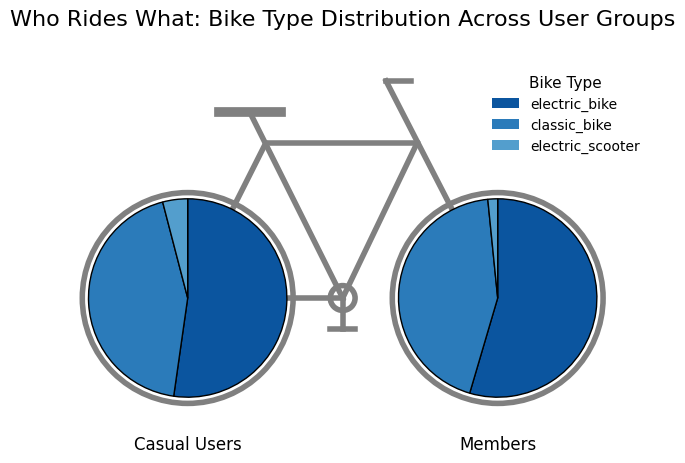

In [77]:
# Get a set of consistent colors from Seaborn
import seaborn as sns
palette = sns.color_palette("Blues_r")
# Reminder to self!
# The _r reverses the palette so that it runs from darkest blue to lightest.

# Step 1: Prepare data
casual_counts = df_clean[df_clean['member_casual'] == 'casual']['rideable_type'].value_counts()
member_counts = df_clean[df_clean['member_casual'] == 'member']['rideable_type'].value_counts()

# Step 2: Create figure and background bike
from matplotlib.patches import Patch, Circle
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlim(-200, 300)
ax.set_ylim(-150, 200)
ax.set_aspect('equal')
ax.axis('off')


def draw_pie_chart(ax, center_x, center_y, data, radius=150, colors=None, title=None):
    size = radius * 2
    x0 = center_x - radius
    y0 = center_y - radius


    # This context ensures no extra padding or background from inset axes
    with plt.rc_context({'axes.facecolor': 'none'}):
        pie_ax = ax.inset_axes([x0, y0, size, size], transform=ax.transData)
        pie_ax.set_aspect('equal')
        pie_ax.axis('off')

        pie_ax.pie(
            data,
            labels=None,
            startangle=90,           # Start at 12 o'clock
            counterclock=False,      # Go clockwise
            colors=colors,
            wedgeprops={'edgecolor': 'black'},
            normalize=True
        )



#### Drawing a bicycle!  ####

## circles first! :) ##
# Left wheel
left_wheel = Circle((-75, -25), 85, fill=True, edgecolor='grey',facecolor='white',linewidth=4)
ax.add_patch(left_wheel)
# right wheel
right_wheel = Circle((175, -25), 85, fill=True, edgecolor='grey',facecolor='white',linewidth=4)
ax.add_patch(right_wheel)
# pedal circle
pedal_circle = Circle((50, -25), 10, fill=False, edgecolor='grey', linewidth=4)
ax.add_patch(pedal_circle)

## now lines! ##
# seat post
ax.plot([50, -25], [-25, 125], color='grey', linewidth=4)
# the seat
ax.plot([-50, 0], [125, 125], color='grey', linewidth=7)
# rear seat post
ax.plot([-75, -12], [-25, 100], color='grey', linewidth=4)
# front handle post
ax.plot([50, 110], [-25, 100], color='grey', linewidth=4)
# fork
ax.plot([175, 85], [-25, 150], color='grey', linewidth=4)
# pedal to rear wheel
ax.plot([-75, 50], [-25, -25], color='grey', linewidth=4)
# top bar
ax.plot([-12, 110], [100, 100], color='grey', linewidth=4)
# handle bar
ax.plot([85, 105], [150, 150], color='grey', linewidth=4)
# pedal vertical
ax.plot([50, 50], [-25, -50], color='grey', linewidth=4)
# pedal horizontal
ax.plot([40, 60], [-50, -50], color='grey', linewidth=4)

# draw_pie_chart(ax, -75, -25, casual_counts, radius=100,
#                colors=['skyblue', 'gold', 'lightgreen'])

# # draw_pie_chart(ax, 175, -25, member_counts, radius=100,
# #                colors=['skyblue', 'gold', 'lightgreen'])

draw_pie_chart(ax, -75, -25, casual_counts, radius=100, colors=palette)
draw_pie_chart(ax, 175, -25, member_counts, radius=100, colors=palette)





# Title
ax.text(50, 200, "Who Rides What: Bike Type Distribution Across User Groups",
        fontsize=16, ha='center', va='center', zorder=20)

# Title under casual users pie chart (left wheel)
ax.text(-75, -150, "Casual Users", fontsize=12, ha='center', va='bottom', zorder=15)

# Title under member users pie chart (right wheel)
ax.text(175, -150, "Members", fontsize=12, ha='center', va='bottom', zorder=15)

colors=palette
labels = casual_counts.index.tolist()  # Or define manually if needed

legend_patches = [
    Patch(facecolor=colors[i % len(colors)], label=labels[i])
    for i in range(len(labels))
]

# Add legend to the bike plot
ax.legend(
    handles=legend_patches,
    title="Bike Type",
    loc='upper right',
    bbox_to_anchor=(1,0.9),
    fontsize=10,
    title_fontsize=11,
    frameon=False
)


plt.show()




### Ride Counts by Weekday and User


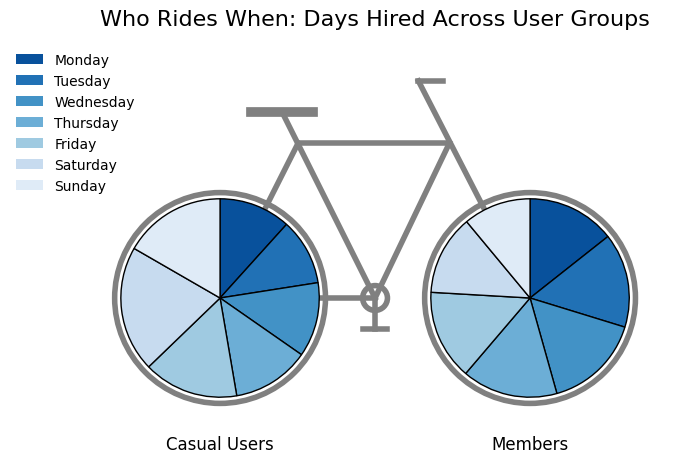

In [79]:
# Get a set of consistent colors from Seaborn
import seaborn as sns
colours = sns.color_palette("Blues_r", n_colors=7)

# Prepare data
casual_counts = df_clean[df_clean['member_casual'] == 'casual']['day_of_week'].value_counts()
member_counts = df_clean[df_clean['member_casual'] == 'member']['day_of_week'].value_counts()
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
casual_counts = casual_counts.reindex(days_order).fillna(0)
member_counts = member_counts.reindex(days_order).fillna(0)
# Define the colors and labels
colors = colours
labels = casual_counts.index.tolist()
legend_patches = [Patch(facecolor=colors[i % len(colors)], label=labels[i]) for i in range(len(labels))]


# Step 3: Create figure and background bike
from matplotlib.patches import Patch, Circle
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlim(-200, 300)
ax.set_ylim(-150, 200)
ax.set_aspect('equal')
ax.axis('off')


def draw_pie_chart(ax, center_x, center_y, data, radius=150, colors=None, title=None):
    size = radius * 2
    x0 = center_x - radius
    y0 = center_y - radius


    # This context ensures no extra padding or background from inset axes
    with plt.rc_context({'axes.facecolor': 'none'}):
        pie_ax = ax.inset_axes([x0, y0, size, size], transform=ax.transData)
        pie_ax.set_aspect('equal')
        pie_ax.axis('off')

        pie_ax.pie(
            data,
            labels=None,
            startangle=90,           # Start at 12 o'clock
            counterclock=False,      # Go clockwise
            colors=colors,
            wedgeprops={'edgecolor': 'black'},
            normalize=True
        )



#### Drawing a bicycle!  ####

## circles first! :) ##
# Left wheel
left_wheel = Circle((-75, -25), 85, fill=True, edgecolor='grey', facecolor='white',linewidth=4)
ax.add_patch(left_wheel)
# right wheel
right_wheel = Circle((175, -25), 85, fill=True, edgecolor='grey',facecolor='white',linewidth=4)
ax.add_patch(right_wheel)
# pedal circle
pedal_circle = Circle((50, -25), 10, fill=False, edgecolor='grey', linewidth=4)
ax.add_patch(pedal_circle)

## now lines! ##
# seat post
ax.plot([50, -25], [-25, 125], color='grey', linewidth=4)
# the seat
ax.plot([-50, 0], [125, 125], color='grey', linewidth=7)
# rear seat post
ax.plot([-75, -12], [-25, 100], color='grey', linewidth=4)
# front handle post
ax.plot([50, 110], [-25, 100], color='grey', linewidth=4)
# fork
ax.plot([175, 85], [-25, 150], color='grey', linewidth=4)
# pedal to rear wheel
ax.plot([-75, 50], [-25, -25], color='grey', linewidth=4)
# top bar
ax.plot([-12, 110], [100, 100], color='grey', linewidth=4)
# handle bar
ax.plot([85, 105], [150, 150], color='grey', linewidth=4)
# pedal vertical
ax.plot([50, 50], [-25, -50], color='grey', linewidth=4)
# pedal horizontal
ax.plot([40, 60], [-50, -50], color='grey', linewidth=4)

draw_pie_chart(ax, -75, -25, casual_counts, radius=100, colors=colors)

draw_pie_chart(ax, 175, -25, member_counts, radius=100, colors=colors)


# Title
ax.text(50, 200, "Who Rides When: Days Hired Across User Groups",
        fontsize=16, ha='center', va='center', zorder=20)

# Title under casual users pie chart (left wheel)
ax.text(-75, -150, "Casual Users", fontsize=12, ha='center', va='bottom', zorder=15)

# Title under member users pie chart (right wheel)
ax.text(175, -150, "Members", fontsize=12, ha='center', va='bottom', zorder=15)

# Define the colors and labels (same order as in draw_pie)
labels = casual_counts.index.tolist()
legend_patches = [Patch(facecolor=colors[i % len(colors)], label=labels[i]) for i in range(len(labels))]

# Sort out the legend
casual_percentages = (casual_counts / casual_counts.sum() * 100).round(1)
member_percentages = (member_counts / member_counts.sum() * 100).round(1)

legend_patches = [
    Patch(facecolor=colors[i % len(colors)],
          label=f"{days_order[i]}")
    for i in range(len(days_order))
]

# Add legend to the bike plot
ax.legend(
    handles=legend_patches,
    #title="Bike Type",
    loc='upper left',
    bbox_to_anchor=(-0.1,0.95),
    fontsize=10,
    title_fontsize=11,
    frameon=False
)


plt.show()


### Weekdays vs Weekends

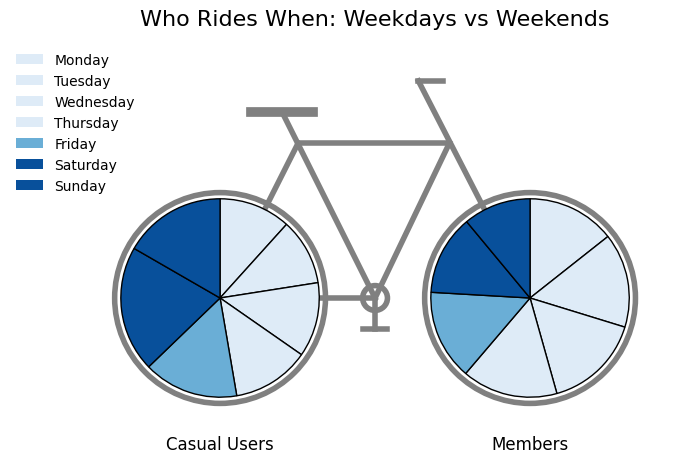

In [80]:
# Get a set of consistent colors from Seaborn
import seaborn as sns
colors = sns.color_palette("Blues", n_colors=7)

# Step 1: Prepare data
casual_counts = df_clean[df_clean['member_casual'] == 'casual']['day_of_week'].value_counts()
member_counts = df_clean[df_clean['member_casual'] == 'member']['day_of_week'].value_counts()
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
casual_counts = casual_counts.reindex(days_order).fillna(0)
member_counts = member_counts.reindex(days_order).fillna(0)
# Define the colors and labels
colors = [colors[0],colors[0],colors[0],colors[0],colors[3],colors[6],colors[6]]
labels = casual_counts.index.tolist()
legend_patches = [Patch(facecolor=colors[i % len(colors)], label=labels[i]) for i in range(len(labels))]


# Step 2: Create figure and background bike
from matplotlib.patches import Patch, Circle
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlim(-200, 300)
ax.set_ylim(-150, 200)
ax.set_aspect('equal')
ax.axis('off')


def draw_pie_chart(ax, center_x, center_y, data, radius=150, colors=None, title=None):
    size = radius * 2
    x0 = center_x - radius
    y0 = center_y - radius


    # This context ensures no extra padding or background from inset axes
    with plt.rc_context({'axes.facecolor': 'none'}):
        pie_ax = ax.inset_axes([x0, y0, size, size], transform=ax.transData)
        pie_ax.set_aspect('equal')
        pie_ax.axis('off')

        pie_ax.pie(
            data,
            labels=None,
            startangle=90,           # Start at 12 o'clock
            counterclock=False,      # Go clockwise
            colors=colors,
            wedgeprops={'edgecolor': 'black'},
            normalize=True
        )



#### Drawing a bicycle!  ####

## circles first! :) ##
# Left wheel
left_wheel = Circle((-75, -25), 85, fill=True, edgecolor='grey', facecolor='white',linewidth=4)
ax.add_patch(left_wheel)
# right wheel
right_wheel = Circle((175, -25), 85, fill=True, edgecolor='grey',facecolor='white',linewidth=4)
ax.add_patch(right_wheel)
# pedal circle
pedal_circle = Circle((50, -25), 10, fill=False, edgecolor='grey', linewidth=4)
ax.add_patch(pedal_circle)

## now lines! ##
# seat post
ax.plot([50, -25], [-25, 125], color='grey', linewidth=4)
# the seat
ax.plot([-50, 0], [125, 125], color='grey', linewidth=7)
# rear seat post
ax.plot([-75, -12], [-25, 100], color='grey', linewidth=4)
# front handle post
ax.plot([50, 110], [-25, 100], color='grey', linewidth=4)
# fork
ax.plot([175, 85], [-25, 150], color='grey', linewidth=4)
# pedal to rear wheel
ax.plot([-75, 50], [-25, -25], color='grey', linewidth=4)
# top bar
ax.plot([-12, 110], [100, 100], color='grey', linewidth=4)
# handle bar
ax.plot([85, 105], [150, 150], color='grey', linewidth=4)
# pedal vertical
ax.plot([50, 50], [-25, -50], color='grey', linewidth=4)
# pedal horizontal
ax.plot([40, 60], [-50, -50], color='grey', linewidth=4)

draw_pie_chart(ax, -75, -25, casual_counts, radius=100, colors=colors)

draw_pie_chart(ax, 175, -25, member_counts, radius=100, colors=colors)


# Title
ax.text(50, 200, "Who Rides When: Weekdays vs Weekends",
        fontsize=16, ha='center', va='center', zorder=20)

# Title under casual users pie chart (left wheel)
ax.text(-75, -150, "Casual Users", fontsize=12, ha='center', va='bottom', zorder=15)

# Title under member users pie chart (right wheel)
ax.text(175, -150, "Members", fontsize=12, ha='center', va='bottom', zorder=15)



# Add legend to the bike plot
ax.legend(
    handles=legend_patches,
    #title="Bike Type",
    loc='upper left',
    bbox_to_anchor=(-0.1,0.95),
    fontsize=10,
    title_fontsize=11,
    frameon=False
)




plt.show()

### Casual vs Member barchart

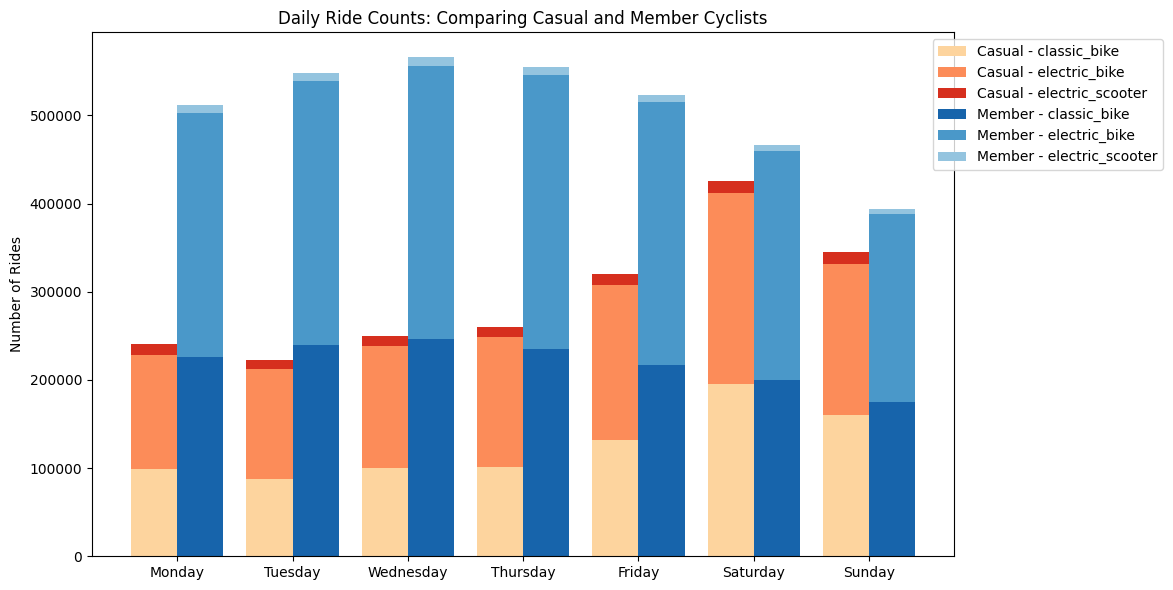

In [81]:
# Get a set of consistent colours from Seaborn
import seaborn as sns
member_colours = sns.color_palette("Blues_r", n_colors=4)
casual_colours = sns.color_palette("OrRd", n_colors=3)
import matplotlib.pyplot as plt

# Step 1: Group and reshape the data
grouped = (
    df.groupby(['day_of_week', 'member_casual', 'rideable_type'])
    .size()
    .unstack(fill_value=0)
)

# Step 2: Reindex to ensure weekday order
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
grouped = grouped.reindex(weekday_order, level=0)

# Step 3: Separate member and casual data
casual = grouped.xs('casual', level='member_casual')
member = grouped.xs('member', level='member_casual')

# # Step 4: Set colours
# casual_colors = ['lightpink', 'hotpink', 'deeppink']  # For each rideable_type in casual
# member_colors = ['lightblue', 'skyblue', 'dodgerblue']  # For each rideable_type in member

# Step 5: Plot
fig, ax = plt.subplots(figsize=(12, 6))

# Define bar positions
x = range(len(weekday_order))
bar_width = 0.4

# Plot casual bars with matching colors
bottom_casual = [0] * len(x)
for i, ride_type in enumerate(casual.columns):
    ax.bar(x, casual[ride_type], bottom=bottom_casual, width=bar_width,
           color=casual_colours[i % len(casual_colours)],
           label=f'Casual - {ride_type}')
    bottom_casual = [i + j for i, j in zip(bottom_casual, casual[ride_type])]

# Plot member bars with matching colors
bottom_member = [0] * len(x)
for i, ride_type in enumerate(member.columns):
    ax.bar([i + bar_width for i in x], member[ride_type], bottom=bottom_member, width=bar_width,
           color=member_colours[i % len(member_colours)],
           label=f'Member - {ride_type}')
    bottom_member = [i + j for i, j in zip(bottom_member, member[ride_type])]



# Styling
ax.set_xticks([i + bar_width / 2 for i in x])
ax.set_xticklabels(weekday_order)
ax.set_ylabel("Number of Rides")
ax.set_title("Daily Ride Counts: Comparing Casual and Member Cyclists")
ax.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.tight_layout()
plt.show()


### Average Hire Duration by User Type


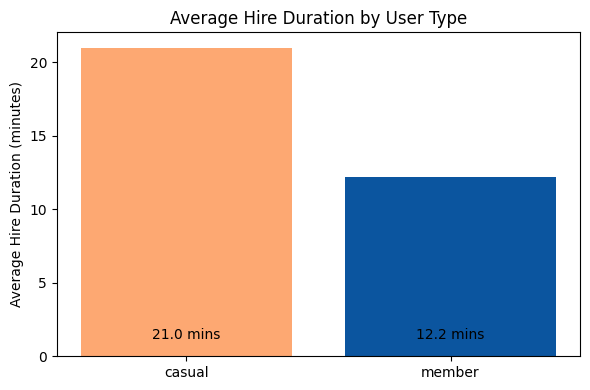

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
# Get a set of consistent colours from Seaborn
import seaborn as sns
member_colours = sns.color_palette("Blues_r")
casual_colours = sns.color_palette("OrRd")


# Step 2: Calculate average duration by user type
avg_duration = df_clean.groupby('member_casual')['hire_time_mins'].mean().round(1)

# Step 3: Plot
fig, ax = plt.subplots(figsize=(6, 4))

# Bar chart
bars = ax.bar(avg_duration.index, avg_duration.values, color=[ casual_colours[2], member_colours[0]])


# Annotate each bar with the average duration
for bar, value in zip(bars, avg_duration.values):
    ax.text(bar.get_x() + bar.get_width()/2, 1, f"{value} mins",
            ha='center', va='bottom', fontsize=10)
# Set y-axis ticks to every 5 minutes
from matplotlib.ticker import MultipleLocator
ax.yaxis.set_major_locator(MultipleLocator(5))

# Chart styling
ax.set_ylabel("Average Hire Duration (minutes)")
ax.set_title("Average Hire Duration by User Type")
plt.tight_layout()
plt.show()


### Hiring Trends

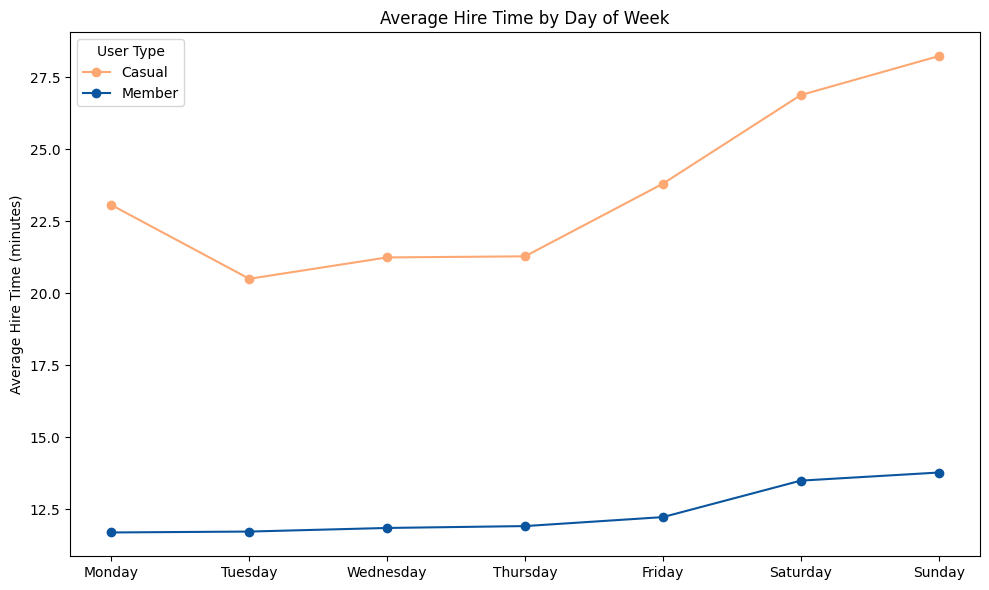

In [100]:
import matplotlib.pyplot as plt
# Get a set of consistent colours from Seaborn
import seaborn as sns
member_colours = sns.color_palette("Blues_r")
casual_colours = sns.color_palette("OrRd")

#Group by day_of_week and member_casual, then calculate average hire_time
avg_hire_time = (
    df.groupby(['day_of_week', 'member_casual'])['hire_time']
    .mean()
    .unstack()
    .reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
)

# Convert timedelta to minutes for plotting
avg_hire_time_minutes = avg_hire_time / pd.Timedelta(minutes=1)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(avg_hire_time_minutes.index, avg_hire_time_minutes['casual'], marker='o', label='Casual', color=casual_colours[2])
plt.plot(avg_hire_time_minutes.index, avg_hire_time_minutes['member'], marker='o', label='Member', color=member_colours[0])

# Styling
plt.title("Average Hire Time by Day of Week")
plt.xlabel("")
plt.ylabel("Average Hire Time (minutes)")
plt.legend(title="User Type")
plt.tight_layout()
plt.show()


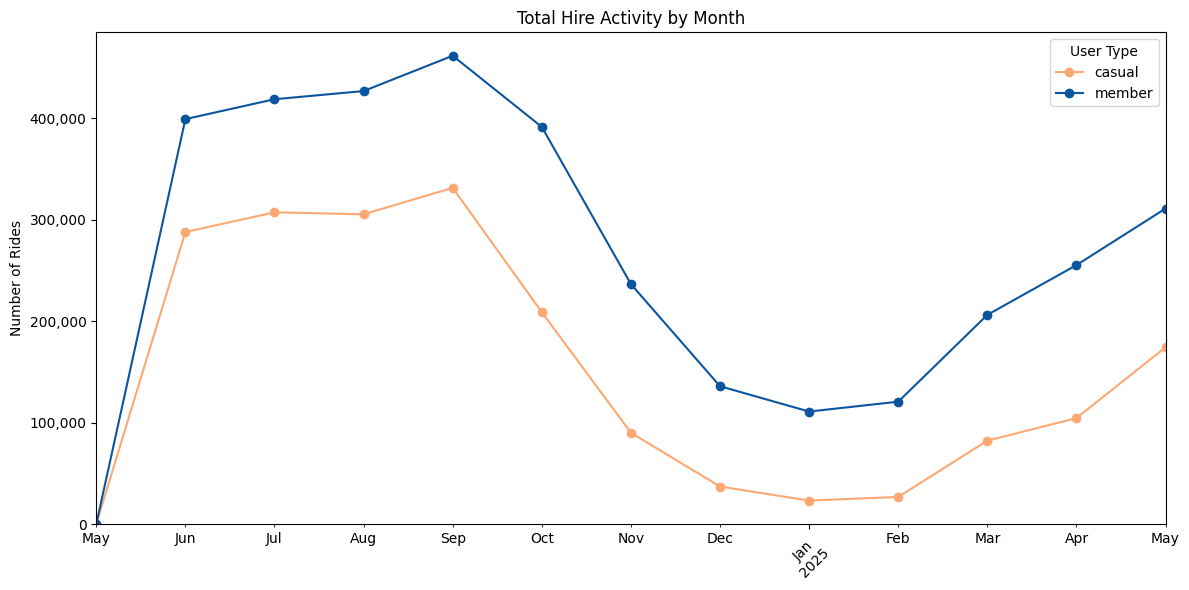

In [98]:
import matplotlib.ticker as mticker
# Get a set of consistent colours from Seaborn
import seaborn as sns
member_colours = sns.color_palette("Blues_r")
casual_colours = sns.color_palette("OrRd")


# Plot
monthly_total_rides.plot(figsize=(12, 6), marker='o', color=[casual_colours[2], member_colours[0]])

ax = plt.gca()
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{int(x):,}"))  # <-- Add commas

plt.ylabel("Number of Rides")
plt.xlabel("")
plt.title("Total Hire Activity by Month")
plt.xticks(rotation=45)
ax.set_ylim(0)  # Y-axis minimum value
plt.legend(title="User Type")
plt.tight_layout()
plt.show()


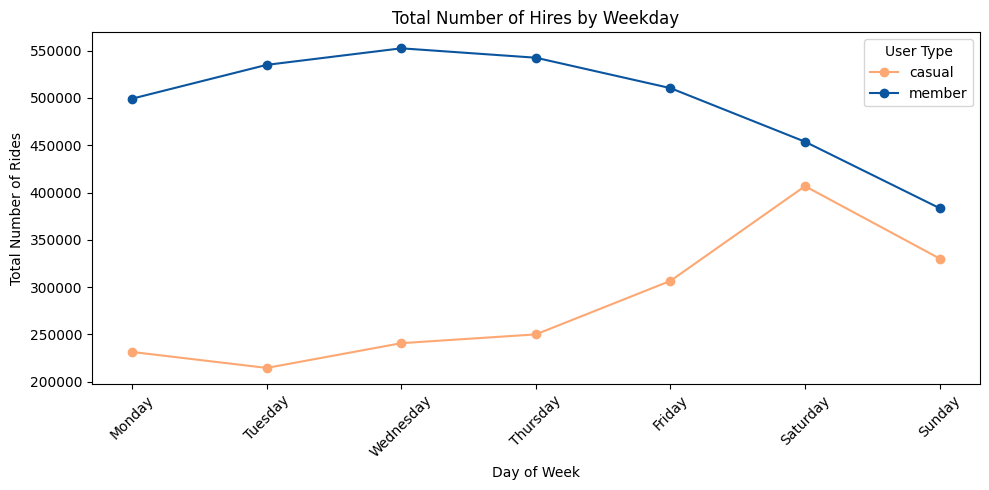

In [84]:
# Get a set of consistent colours from Seaborn
import seaborn as sns
member_colours = sns.color_palette("Blues_r")
casual_colours = sns.color_palette("OrRd")

# Group by weekday and user type
weekday_total = df_clean.groupby(['day_of_week', 'member_casual']).size().unstack()

# Reorder days
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_total = weekday_total.reindex(days_order)

# Plot
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 5))
weekday_total.plot(kind='line', ax=ax, marker='o', color=[casual_colours[2], member_colours[0]])

ax.set_ylabel("Total Number of Rides")
ax.set_xlabel("Day of Week")
ax.set_title("Total Number of Hires by Weekday")
ax.legend(title="User Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Summary of Key Findings & Recommendations
### Key Findings
- Casual riders tend to hire for longer periods of time and prefer weekends
- Member riders are more consistent across the week and prefer weekdays
- Hire volumes peak on Saturdays
- Both members and casual users use electric bikes most, followed by classic bikes, then electric scooters

### Recommendations
Entice casual users towards membership by:
1. Offering weekend trial memberships
2. "Upgrade and save" campaigns timed for Saturday/Sunday usage
3. Tailor marketing to show that membership would save money for longer hire length.






# **Sandbox**
## Everything below here is exploratory ideas, experimentation, general notes. Not for inclusion in presentations!


## **Start visualising the data**

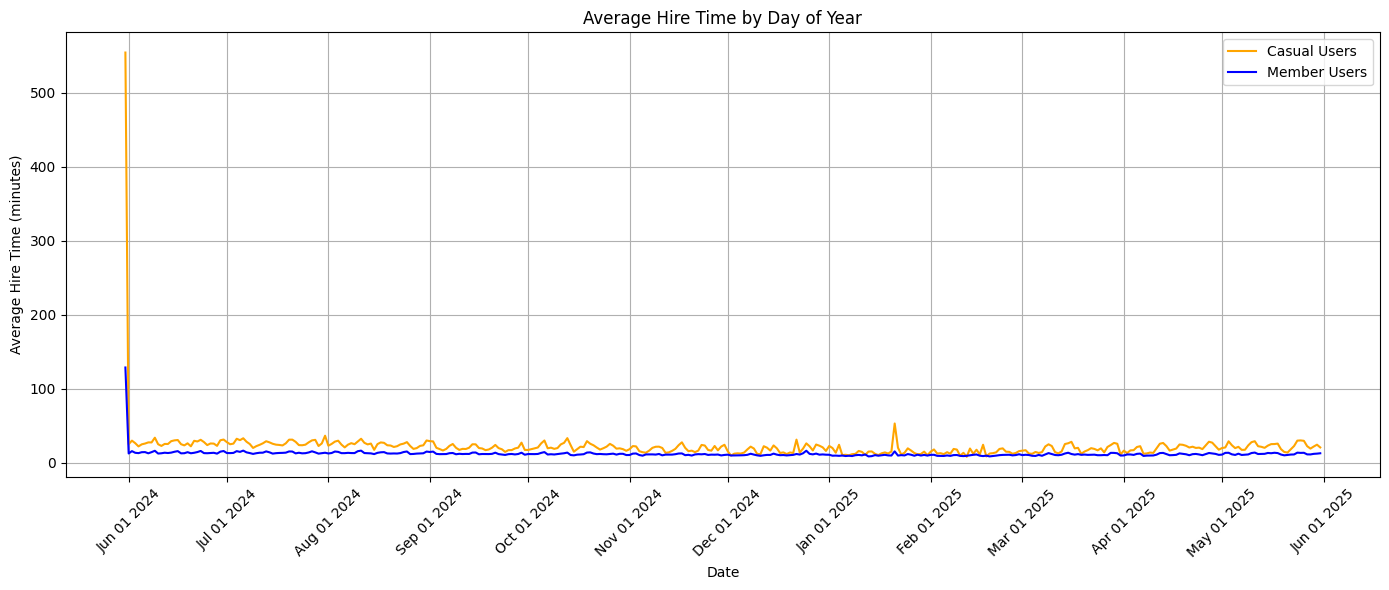

In [102]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Step 1: Ensure started_at is datetime
df['started_at'] = pd.to_datetime(df['started_at'])

# Step 2: Create 'day_of_year' column
df['day_of_year'] = df['started_at'].dt.strftime('%Y-%m-%d')

# Step 3: Group and calculate average hire_time
daily_avg = (
    df.groupby(['day_of_year', 'member_casual'])['hire_time']
    .mean()
    .unstack()
)

# Step 4: Convert index to datetime and hire_time to minutes
daily_avg.index = pd.to_datetime(daily_avg.index)
daily_avg_minutes = daily_avg / pd.Timedelta(minutes=1)

# Step 5: Plot with monthly ticks
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(daily_avg_minutes.index, daily_avg_minutes['casual'], label='Casual Users', color='orange')
ax.plot(daily_avg_minutes.index, daily_avg_minutes['member'], label='Member Users', color='blue')

# Format x-axis to show only the 1st of each month
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d %Y'))

# Styling
plt.title("Average Hire Time by Day of Year")
plt.xlabel("Date")
plt.ylabel("Average Hire Time (minutes)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [103]:
# Look at the first few rows by started_at
early_dates = df.sort_values(by='started_at').head(10)
print(early_dates[['started_at', 'ended_at', 'hire_time']])


                     started_at                ended_at              hire_time
5569825 2024-05-31 01:02:49.582 2024-06-01 02:02:43.407 1 days 00:59:53.825000
5621182 2024-05-31 01:09:43.561 2024-06-01 02:09:36.476 1 days 00:59:52.915000
5368878 2024-05-31 06:32:22.834 2024-06-01 07:32:01.767 1 days 00:59:38.933000
5563793 2024-05-31 07:16:24.189 2024-06-01 08:16:16.121 1 days 00:59:51.932000
5571822 2024-05-31 09:27:11.855 2024-06-01 10:26:48.871 1 days 00:59:37.016000
5367305 2024-05-31 11:03:57.427 2024-06-01 12:03:51.943 1 days 00:59:54.516000
5554229 2024-05-31 11:06:59.084 2024-06-01 12:06:55.672 1 days 00:59:56.588000
5381563 2024-05-31 11:17:13.590 2024-06-01 12:17:05.246 1 days 00:59:51.656000
5372351 2024-05-31 11:30:35.361 2024-06-01 12:30:30.620 1 days 00:59:55.259000
5020280 2024-05-31 11:49:34.737 2024-06-01 00:05:55.345 0 days 12:16:20.608000


In [104]:
# Filter rows where hire_time is greater than 1 day
long_hires = df[df['hire_time'] > pd.Timedelta(days=1)]

# Display relevant columns for inspection
print(long_hires[['started_at', 'ended_at', 'hire_time', 'member_casual', 'rideable_type']])


                     started_at                ended_at  \
118     2025-05-18 17:24:15.005 2025-05-19 18:24:12.032   
10060   2025-05-25 17:55:35.681 2025-05-26 18:55:31.511   
10061   2025-05-25 17:59:29.794 2025-05-26 18:59:27.531   
10100   2025-05-25 13:58:22.306 2025-05-26 14:58:19.777   
10201   2025-05-23 12:26:00.818 2025-05-24 13:25:57.560   
...                         ...                     ...   
5628467 2024-06-18 13:49:53.449 2024-06-19 14:49:31.381   
5628490 2024-06-09 16:43:22.007 2024-06-10 17:43:15.972   
5628583 2024-06-12 07:39:28.931 2024-06-13 08:39:06.942   
5628717 2024-06-03 08:50:30.189 2024-06-04 09:50:22.823   
5628759 2024-06-09 10:13:42.256 2024-06-10 11:13:31.351   

                     hire_time member_casual rideable_type  
118     1 days 00:59:57.027000        casual  classic_bike  
10060   1 days 00:59:55.830000        casual  classic_bike  
10061   1 days 00:59:57.737000        casual  classic_bike  
10100   1 days 00:59:57.471000        casual  c

The minimum ride time was less than 1 second. I want to see how many are very short hire times

In [ ]:
# Filter rows where ride_length is less than 1 minute
short_rides = df[df['hire_time'] < pd.Timedelta(minutes=1)]

# Select specific columns from short_rides
short_rides_subset = short_rides[[
    'started_at',
    'ended_at',
    'hire_time',
    'start_lat',
    'end_lat',
    'start_lng',
    'end_lng'
]]

# Display the result
print(short_rides_subset)


number of unique values per column:

In [ ]:
df.nunique()

How many nulls in each column?

In [ ]:
df.isnull().sum()

From the above, it is clear that there are a lot of rows which have missing station information.

percentage of missing values:

In [ ]:
(df.isnull().sum() / len(df)) * 100

## Cleaning the data
There are a few things that immediately become apparent from the above.
1. There are a lot of missing ending coordinates.
2. Almost 20% of data rows are missing bike station information, although none are missing starting longtitude and  lattitude. This implies there is scope to use the longtitude and lattitude to backfil the bike station name and id.

###1. Investigate missing end coordinates
Check is it both latitude and longtitude missing on each null row?

In [106]:
# Show rows where one coordinate is null but not both
partial_missing_end = df[
    (df['end_lat'].isnull() & df['end_lng'].notnull()) |
    (df['end_lat'].notnull() & df['end_lng'].isnull())
]

# Display the result
partial_missing_end



,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,hire_time,day_of_week,hire_time_mins,day_of_year


Check - if the ending latitude is null is there any other identifying features that can be used to find the coordinates?

In [107]:
# Filter rows where end_lat is null AND (station_id OR station_name is not null)
filtered = df[
    df['end_lat'].isnull() &
    (
        df['end_station_id'].notnull() |
        df['end_station_name'].notnull()
    )
]

# Display the result
filtered


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,hire_time,day_of_week,hire_time_mins,day_of_year


The above shows that where the end latitude is null, so is the end longtitude as well as the name and id of the bike station. This means that these rows of data are possibly no good for the purposes of analysis and may be removed later.

The below is a few random rows of data where the end_lat is null.

In [108]:
# Select three random rows where end_lat is missing
df[df['end_lat'].isnull()].sample(n=3)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,hire_time,day_of_week,hire_time_mins,day_of_year
729793,4B06642B30504138,classic_bike,2025-04-18 13:13:08.503,2025-04-19 14:13:02.864,Elizabeth St & Randolph St,23001,NaN,NaN,41.884336,-87.658902,NaN,NaN,casual,1 days 00:59:54.361000,Friday,1499.9,2025-04-18
359962,FFA214EFEA934602,classic_bike,2025-05-11 20:41:54.280,2025-05-12 21:41:33.432,Kedzie Ave & 21st St,15686,NaN,NaN,41.853534,-87.705073,NaN,NaN,casual,1 days 00:59:39.152000,Sunday,1499.7,2025-05-11
305036,BAFE4AA66C961E31,classic_bike,2025-05-12 06:08:31.557,2025-05-12 07:37:47.472,Dayton St & North Ave,13058,NaN,NaN,41.910578,-87.649422,NaN,NaN,member,0 days 01:29:15.915000,Monday,89.3,2025-05-12


Interestingly all end dates are one day after start date. Is this the case for all of them?

In [110]:
# Filter rows where end_lat is missing
end_lat_null = df[df['end_lat'].isnull()]

# Count where dates differ
count_differ = (end_lat_null['started_at'].dt.date != end_lat_null['ended_at'].dt.date).sum()

# Count where dates match
count_match = (end_lat_null['started_at'].dt.date == end_lat_null['ended_at'].dt.date).sum()

# Display results
print(f"Count where dates differ: {count_differ}")
print(f"Count where dates match: {count_match}")


Count where dates differ: 6157
Count where dates match: 9


In [111]:
# Filter rows where end_lat is null AND start and end dates are different
filtered = df[
    df['end_lat'].isnull() &
    (df['started_at'].dt.date == df['ended_at'].dt.date)
]

# Display the result
filtered


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,hire_time,day_of_week,hire_time_mins,day_of_year
98115,36CC856E72C50199,classic_bike,2025-05-27 16:18:17.145,2025-05-27 16:20:37.711,Montrose Harbor,TA1308000012,NaN,NaN,41.963982,-87.638181,NaN,NaN,casual,0 days 00:02:20.566000,Tuesday,2.3,2025-05-27
305036,BAFE4AA66C961E31,classic_bike,2025-05-12 06:08:31.557,2025-05-12 07:37:47.472,Dayton St & North Ave,13058,NaN,NaN,41.910578,-87.649422,NaN,NaN,member,0 days 01:29:15.915000,Monday,89.3,2025-05-12
358273,D22883F5CF99C591,classic_bike,2025-05-30 13:14:04.415,2025-05-30 13:39:19.444,Clark St & Winnemac Ave,TA1309000035,NaN,NaN,41.973348,-87.667855,NaN,NaN,casual,0 days 00:25:15.029000,Friday,25.3,2025-05-30
695316,B3069671953174C5,classic_bike,2025-04-14 14:09:36.562,2025-04-14 16:15:17.596,Cityfront Plaza Dr & Pioneer Ct,13427,NaN,NaN,41.890573,-87.622072,NaN,NaN,casual,0 days 02:05:41.034000,Monday,125.7,2025-04-14
722800,84C6FC75E67C90C9,classic_bike,2025-04-18 07:54:56.363,2025-04-18 08:53:13.708,Broadway & Argyle St,13108,NaN,NaN,41.974230,-87.659774,NaN,NaN,member,0 days 00:58:17.345000,Friday,58.3,2025-04-18
728335,C02E5C95EA5B5399,classic_bike,2025-04-27 16:12:12.138,2025-04-27 17:41:54.776,Griffin Museum of Science and Industry,KA1503000074,NaN,NaN,41.791728,-87.583945,NaN,NaN,casual,0 days 01:29:42.638000,Sunday,89.7,2025-04-27
1036218,D8543E5C949998F6,classic_bike,2025-03-30 12:17:42.037,2025-03-30 22:36:07.979,Michigan Ave & Oak St,13042,NaN,NaN,41.900960,-87.623777,NaN,NaN,casual,0 days 10:18:25.942000,Sunday,618.4,2025-03-30
1039675,D1A06D591EC0DDE5,classic_bike,2025-03-28 08:14:28.337,2025-03-28 10:13:53.771,Midway Orange Line,24289,NaN,NaN,41.786920,-87.738920,NaN,NaN,casual,0 days 01:59:25.434000,Friday,119.4,2025-03-28
1044528,A6075ECB3A58D9E9,classic_bike,2025-03-30 11:57:54.649,2025-03-30 17:14:29.785,Shore Dr & 55th St,TA1308000009,NaN,NaN,41.795212,-87.580715,NaN,NaN,member,0 days 05:16:35.136000,Sunday,316.6,2025-03-30


In [112]:
# Filter rows where end_lat is not missing
end_lat_null = df[df['end_lat'].notnull()]

# Count where dates differ
count_differ = (end_lat_null['started_at'].dt.date != end_lat_null['ended_at'].dt.date).sum()

# Count where dates match
count_match = (end_lat_null['started_at'].dt.date == end_lat_null['ended_at'].dt.date).sum()

# Display results
print(f"Count where dates differ: {count_differ}")
print(f"Count where dates match: {count_match}")

Count where dates differ: 21494
Count where dates match: 5601187


## Superflous data cleaning - just keeping in for the sake of it.

The following examines what the outcome of rounding the latitude and longtitude of the starting positions is.

In [ ]:
# Effects of rounding the starting latittude and longtitude.
# Create rounded coordinate pairs
df['coord_1dp'] = list(zip(df['start_lat'].round(1), df['start_lng'].round(1)))
df['coord_2dp'] = list(zip(df['start_lat'].round(2), df['start_lng'].round(2)))
df['coord_3dp'] = list(zip(df['start_lat'].round(3), df['start_lng'].round(3)))
df['coord_4dp'] = list(zip(df['start_lat'].round(4), df['start_lng'].round(4)))

# Count unique coordinate pairs
collapse_summary = {
    'Original': df[['start_lat', 'start_lng']].drop_duplicates().shape[0],
    'Rounded to 1dp': df['coord_1dp'].nunique(),
    'Rounded to 2dp': df['coord_2dp'].nunique(),
    'Rounded to 3dp': df['coord_3dp'].nunique(),
    'Rounded to 4dp': df['coord_4dp'].nunique()
}

# Display as DataFrame
collapse_df = pd.DataFrame.from_dict(collapse_summary, orient='index', columns=['Unique Coordinates'])
collapse_df



Given the above, it seems sensible to round to 3 decimal places. First let's add a start and end coordinates as tuples to the dataset. (NB - According to google 3dp is approximately 111 metres on a map.)

In [ ]:
# Generate coordinate tuples from latitude and longitude
df['start_coordinates'] = list(zip(df['start_lat'].round(3), df['start_lng'].round(3)))
df['end_coordinates'] = list(zip(df['end_lat'].round(3), df['end_lng'].round(3)))


In [ ]:
df.info()


Now use the starting coordinate field to build up a full list of station id's and names...


In [ ]:
# Step 1: Filter rows with valid coordinates
valid = df[df['start_coordinates'].notnull()]

# Step 2: Group by coordinates and extract first non-null station info
station_list = (
    valid
    .groupby('start_coordinates', as_index=False)
    .agg({
        'start_station_id': lambda x: x.dropna().iloc[0] if not x.dropna().empty else None,
        'start_station_name': lambda x: x.dropna().iloc[0] if not x.dropna().empty else None
    })
)

# Step 3: Rename columns for consistency
station_list.rename(columns={
    'start_coordinates': 'coordinates',
    'start_station_id': 'station_id',
    'start_station_name': 'station_name'
}, inplace=True)

# Step 4: Drop rows where station_id or station_name is still missing
station_list = station_list.dropna(subset=['station_id', 'station_name'])


In [ ]:
station_list.info()

In [ ]:
station_list.head(100)

We now have a list of stations which we can use to populate nulls from the original dataset.

In [ ]:
# Step 1: Build lookup tables from station_list
lookup_id = station_list.set_index('coordinates')['station_id']
lookup_name = station_list.set_index('coordinates')['station_name']

# Step 2: Fill missing START station info
df['start_station_id'] = df['start_station_id'].combine_first(
    df['start_coordinates'].map(lookup_id)
)
df['start_station_name'] = df['start_station_name'].combine_first(
    df['start_coordinates'].map(lookup_name)
)

# Step 3: Fill missing END station info
df['end_station_id'] = df['end_station_id'].combine_first(
    df['end_coordinates'].map(lookup_id)
)
df['end_station_name'] = df['end_station_name'].combine_first(
    df['end_coordinates'].map(lookup_name)
)


Having merged, recheck percentage of nulls

In [ ]:
(df.isnull().sum() / len(df)) * 100

There's still over 10% of stations that are null which is more than I was anticipating/expecting.

The following is to understand what might be causing this:

In [ ]:
# Count rows with missing start or end station info
missing_start = df[df['start_station_id'].isnull() | df['start_station_name'].isnull()]
missing_end = df[df['end_station_id'].isnull() | df['end_station_name'].isnull()]

print("Missing start info:", missing_start.shape[0])
print("Missing end info:", missing_end.shape[0])


In [ ]:
missing_start[['start_coordinates', 'start_lat', 'start_lng']].sample(10)


It appears that all these are just two decimal places which I suspect might be the problem. I will build a 2dp version of station_list:

In [ ]:
# Create a new coordinate column rounded to 2 decimal places in station_list
station_list['coordinates_2dp'] = station_list['coordinates'].apply(
    lambda x: (round(x[0], 2), round(x[1], 2))
)


In [ ]:
# Create 2 decimal place version of coordinates in df
df['start_coordinates_2dp'] = df['start_coordinates'].apply(
    lambda x: (round(x[0], 2), round(x[1], 2)) if pd.notnull(x) else None
)
df['end_coordinates_2dp'] = df['end_coordinates'].apply(
    lambda x: (round(x[0], 2), round(x[1], 2)) if pd.notnull(x) else None
)

In [ ]:
lookup_id_2dp = station_list.set_index('coordinates_2dp')['station_id']
lookup_name_2dp = station_list.set_index('coordinates_2dp')['station_name']


In [ ]:
# Drop duplicates so each coordinate_2dp maps to one station
station_list_2dp = station_list.drop_duplicates(subset='coordinates_2dp')

# Now build lookup tables safely
lookup_id_2dp = station_list_2dp.set_index('coordinates_2dp')['station_id']
lookup_name_2dp = station_list_2dp.set_index('coordinates_2dp')['station_name']


In [ ]:
df['start_station_id'] = df['start_station_id'].combine_first(
    df['start_coordinates_2dp'].map(lookup_id_2dp)
)
df['start_station_name'] = df['start_station_name'].combine_first(
    df['start_coordinates_2dp'].map(lookup_name_2dp)
)

df['end_station_id'] = df['end_station_id'].combine_first(
    df['end_coordinates_2dp'].map(lookup_id_2dp)
)
df['end_station_name'] = df['end_station_name'].combine_first(
    df['end_coordinates_2dp'].map(lookup_name_2dp)
)


Having merged again, check percentage of nulls:

In [ ]:
(df.isnull().sum() / len(df)) * 100

This is now in an acceptable margin (less than 1% of the data contains nulls)

## Create clean dataset

In [ ]:
# Only drop rows missing station info
df_clean = df.dropna(subset=[
    'start_station_id', 'start_station_name',
    'end_station_id', 'end_station_name'
]).copy()
